## Steps we are going to follow:

1. Reading, understanding and cleaning the dataset.
2. Exploratory Data Analysis (EDA).
3. Handling dataset with Dummy variable creations.
4. Scaling the dataset.
5. Splitting the data into train and test sets.
6. Building the model.
7. Model Evaluation.
8. Prediction on test set.

In [1]:
# Importing necessary libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings to suppress any

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading and understanding the data

In [2]:
# Importing the dataset with pandas.

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking info of the data columns

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Checking the data with some statistical measures.

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data cleaning

In [5]:
# Checking if there are any duplicate values for 'Lead Number'

sum(lead_df.duplicated(subset = 'Lead Number')) == 0

True

Turns out there are no duplicate numbers or records.<br>
So, we can drop the 'Lead Number' and 'Prospect ID' as they are just IDs assigned to the leads.

In [6]:
lead_df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

Now, let's check the columns that were having 'select' elements in them.

In [7]:
lead_df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [8]:
lead_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [9]:
# lead_df['Lead Profile'].value_counts()

In [10]:
lead_df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Visualizing the above columns to get an overview of distribution and their relation with target variable.

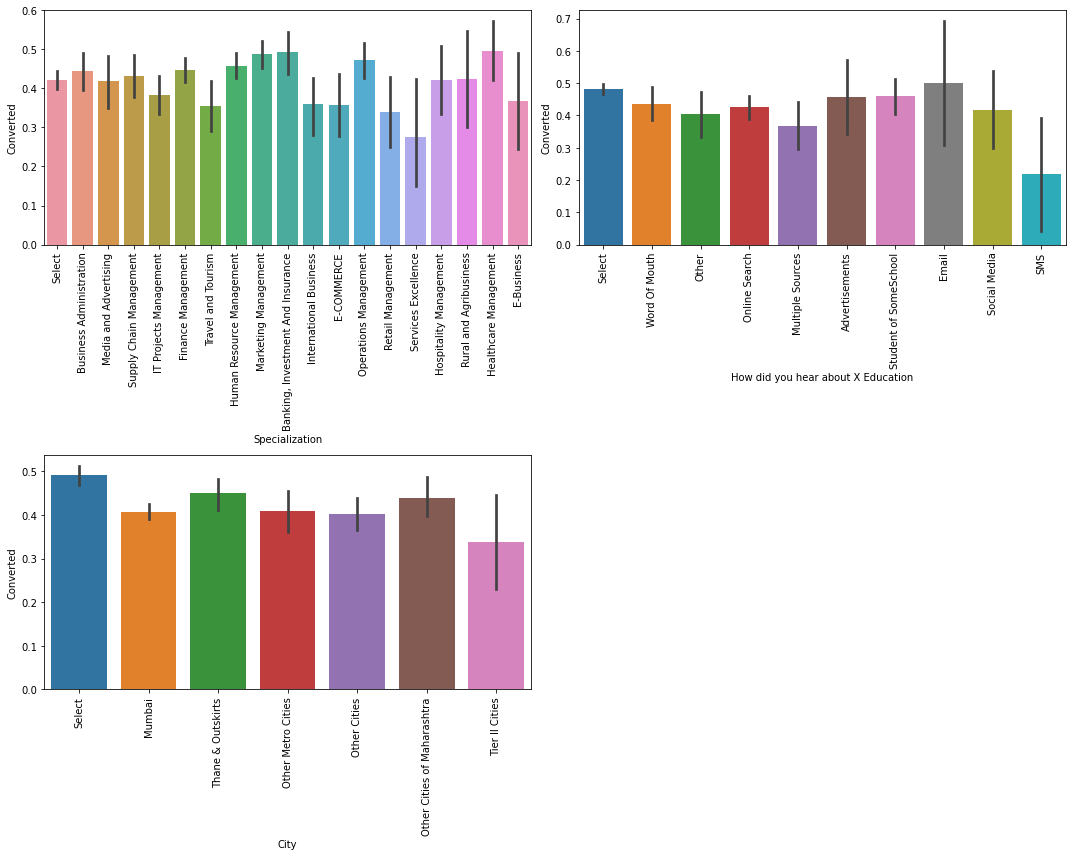

In [11]:
fig = plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
sns.barplot(x = 'Specialization', y = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)

plt.subplot(2,2,2)
sns.barplot(x = 'How did you hear about X Education', y = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)

plt.subplot(2,2,3)
sns.barplot(x = 'City', y = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)

fig.tight_layout()
plt.show()

In [12]:
# Converting 'Select' values to 'Unknown'

df2 = lead_df.replace('Select', 'Unknown')

In [13]:
# Checking unique values in each column to determine single valued columns.

df2.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
# Dropping columns with one one unique values in them.

df2 = df2.drop(['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Magazine'], axis = 1)

In [15]:
# Dropping the Sales generated columns.

df2 = df2.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality', 'Tags', 'How did you hear about X Education', 'Last Activity', 'Last Notable Activity', 'Lead Profile'], axis = 1)

Now, let's check the percentage of null values in the data.

In [16]:
round(df2.isnull().sum()/len(df2) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
City      

So no column have null values more then 30% here, therefore let's start handling the available nulls.

In [17]:
# Checking value counts in Country column

df2.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
Ghana                      2
Uganda                     2
Bangladesh                 2
Asia/Pacific Region        2
China                      2
Italy                      2
Belgium                    2
Netherlands                2
Philippines                2
Vietnam                    1
Liberia                    1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Indonesia                  1
Malaysia      

We can see 'Country' column have 70% of values as 'India'.<br>
It also have 26% null values which we will be replacing with a new category 'Not provided'.<br>

In [18]:
df2['Country'] = df2['Country'].fillna('not provided')

In [19]:
df2.Country.value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
Belgium                    2
China                      2
Uganda                     2
Philippines                2
Netherlands                2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Bangladesh                 2
Malaysia                   1
Kenya                      1
Indonesia                  1
Switzerland                1
Denmark                    1
Tanzania      

Now as we have so many countries with very few counts, we will be grouping them into three categories as 'India', 'Outside India' and 'Not porvided'.

In [20]:
def cntry(x):
    category = ""
    if x == "India":
        cat = "india"
    elif x == "not provided":
        cat = "not provided"
    elif x =="unknown":
        cat = "not provided"
    else:
        cat = "outside india"
    
    return cat

df2['Country'] = df2.apply(lambda x: cntry(x['Country']), axis = 1)

In [21]:
df2.Country.value_counts()

india            6492
not provided     2466
outside india     282
Name: Country, dtype: int64

Now let's check the City column.

In [22]:
round((df2.City.value_counts()/df2.shape[0]) * 100, 2)

Mumbai                         34.87
Unknown                        24.34
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

Seem like City column consists of mostly Indian cities and no specific cities outside India, therefore it would be better to drop this column.

In [23]:
# Dropping City' column.

df2 = df2.drop('City', axis = 1)

In [24]:
# Replacing null values with 'Unknown' value in Specialization column.

df2.Specialization = df2.Specialization.replace(np.nan,'Unknown')

In [25]:
# Let's check null values again.
round(df2.isnull().sum()/len(df2) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [26]:
# Checking value counts of 'What is your current occupation' column.
df2['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

The column 'What is your current occupation' have 29% null values. So let us replace them to 'Unknown'.

In [27]:
df2['What is your current occupation'] = df2['What is your current occupation'].replace(np.nan, 'Unknown')

In [28]:
df2['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The column 'What matters most to you in choosing a course' have almost every value as 'Better Career Prospect', therefore let's drop this column too.

In [29]:
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].replace(np.nan, 'Unknown')

In [30]:
df2.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [31]:
df2.TotalVisits = df2.TotalVisits.replace(np.nan, df2.TotalVisits.median())

In [32]:
df2['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [33]:
df2['Page Views Per Visit'] = df2['Page Views Per Visit'].replace(np.nan, df2['Page Views Per Visit'].median())

In [34]:
df2['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [35]:
df2['Lead Source'] = df2['Lead Source'].replace(['google', np.nan], 'Google')

At last, once again checking the null percentage in dataset.

In [36]:
# Let's check null values again.

round(df2.isnull().sum()/len(df2) * 100, 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

### Outlier analysis

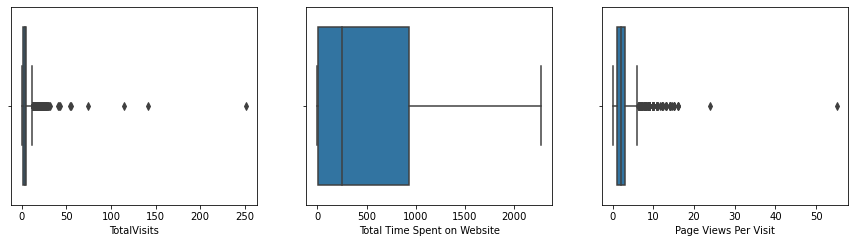

In [37]:
# Checking outliers in numeric columns

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.boxplot(df2['TotalVisits'])

plt.subplot(2,3,2)
sns.boxplot(df2['Total Time Spent on Website'])

plt.subplot(2,3,3)
sns.boxplot(df2['Page Views Per Visit'])

plt.show()

'TotalVisits' and 'Page Views Per Visit' are having clear outlier.<br>
We are going to remove the outliers beyond 99th percentile.

In [38]:
# Let's remove the outliers beyond the 99th percentile.

outlier_totalvisits = df2.TotalVisits.quantile(0.99)

df2 = df2[df2.TotalVisits < outlier_totalvisits]

In [39]:
outlier_pageViews = df2['Page Views Per Visit'].quantile(0.99)

df2 = df2[df2.TotalVisits < outlier_pageViews]

## EDA

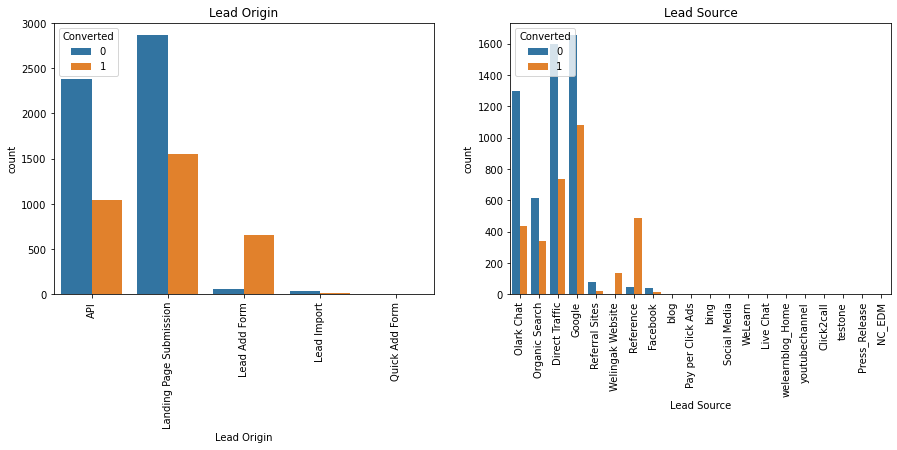

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(df2['Lead Origin'], hue=df2.Converted).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(df2['Lead Source'], hue=df2.Converted).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

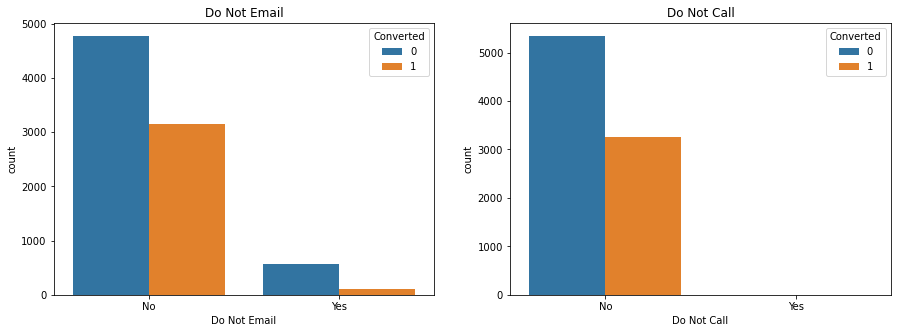

In [41]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(df2['Do Not Email'], hue=df2.Converted)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(df2['Do Not Call'], hue=df2.Converted)
plt.title('Do Not Call')

plt.show()

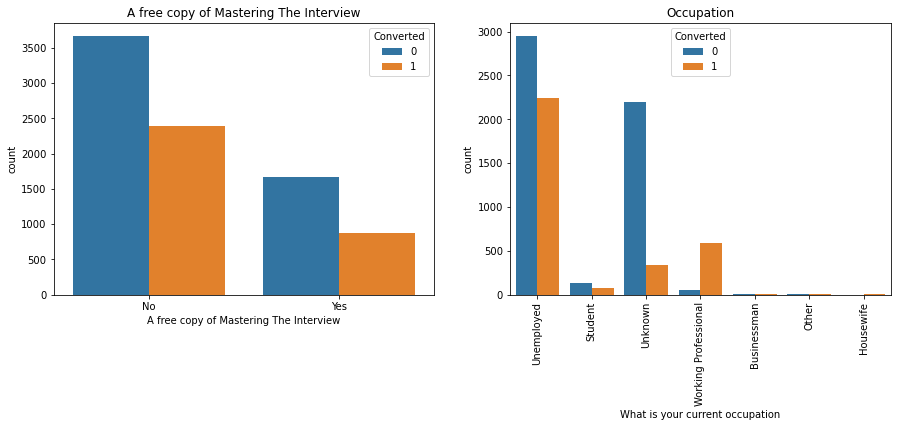

In [42]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(df2['A free copy of Mastering The Interview'], hue=df2.Converted)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(df2['What is your current occupation'], hue=df2.Converted).tick_params(axis='x', rotation = 90)
plt.title('Occupation')

plt.show()

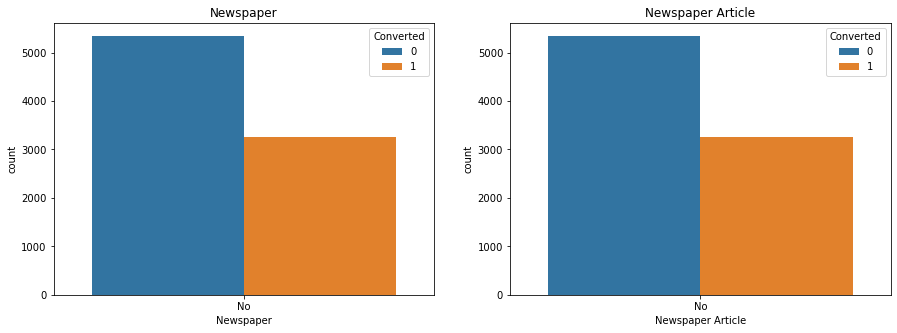

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(df2['Newspaper'], hue=df2.Converted)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(df2['Newspaper Article'], hue=df2.Converted)
plt.title('Newspaper Article')

plt.show()

Though I am not very sure to drop 'Newspaper'  and 'Newspaper Article' columns, but since they consist of only one value 'No', they would not help in any prediction, so let's drop them.

In [44]:
df2 = df2.drop(['Newspaper', 'Newspaper Article'], axis = 1)

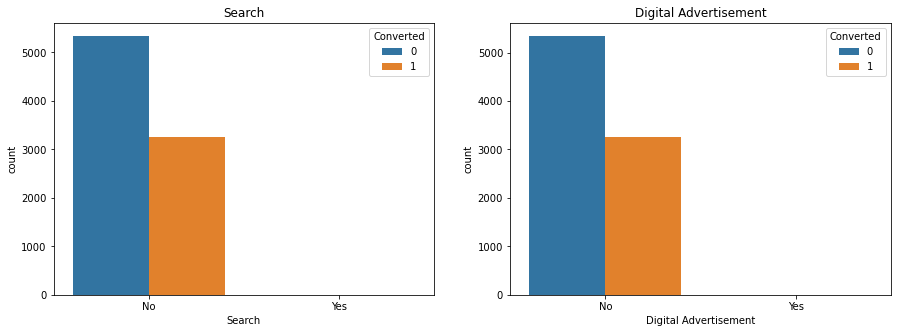

In [45]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(df2['Search'], hue=df2.Converted)
plt.title('Search')

plt.subplot(1,2,2)
sns.countplot(df2['Digital Advertisement'], hue=df2.Converted)
plt.title('Digital Advertisement')

plt.show()

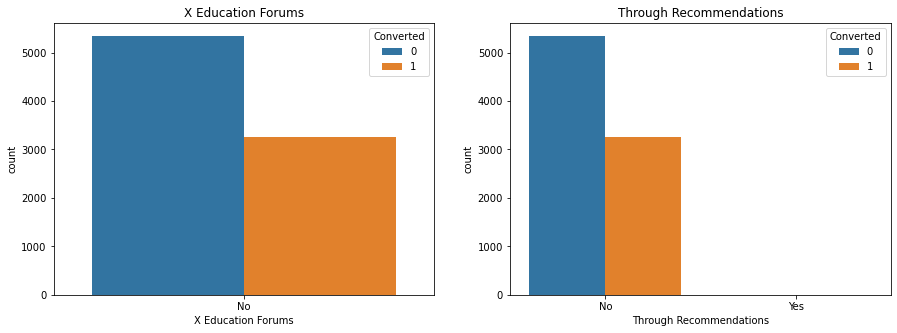

In [46]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(df2['X Education Forums'], hue=df2.Converted)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(df2['Through Recommendations'], hue=df2.Converted)
plt.title('Through Recommendations')

plt.show()

In [47]:
# Dropping 'X Education Forum' column also.

df2 = df2.drop(['X Education Forums'], axis = 1)

## Few points observed from the above visualisations:

1. Lead Origin: API and Landing Page Submission have more conversions. Lead Add From have good conversion rate.
2. Lead Source: Google, Direct Traffic, Olark Chat and Organic Search have shown higher conversions, but Reference and Welingak Website have better and higher conversion rate than others.
3. Do Not Email: Lead conversion for those opted for email service is higher.
4. Do Not Call: Lead conversion for those opted for call service is higher.
5. What is your current occupation: Unemployeed and Working Professionals are seen to be converted much more than others.
6. A free copy of mastering the interview: Those who didn't opt for this copy have more conversion, but those who opted also have good conversion. Can't be ignored.
7. And for 'Search', 'Digital Advertisment' and 'Through Recommendations' have few values of 'Yes's so most conversions are seen for 'No' value only.

Let's check the correlation between numeric variables.

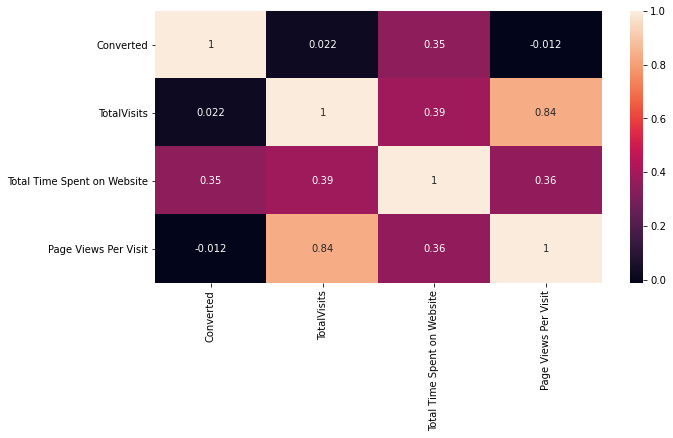

In [48]:
plt.figure(figsize = (10, 5))
sns.heatmap(df2.corr(), annot = True)
plt.show()

## Dummy Variables handling

In [49]:
# First we will map the 'yes' and 'no' values in columns to 0 and 1.

var_list = ['Do Not Email', 'Do Not Call', 'Search', 'A free copy of Mastering The Interview', 'Through Recommendations', 'Digital Advertisement']

def mapper(x):
    return x.map({'Yes': 1, 'No': 0})

df2[var_list] = df2[var_list].apply(mapper)

In [50]:
# Let's us create dummy variables for categorical variables using get_dummies from pandas.

dummy = pd.get_dummies(df2['Lead Origin'], prefix = 'Origin', drop_first = True)
df2 = pd.concat([df2, dummy], axis = 1)

dummy = pd.get_dummies(df2['What is your current occupation'], prefix = 'Occupation', drop_first = True)
df2 = pd.concat([df2, dummy], axis = 1)

dummy = pd.get_dummies(df2['Specialization'], prefix = 'Specialization', drop_first = True)
df2 = pd.concat([df2, dummy], axis = 1)

dummy = pd.get_dummies(df2['Lead Source'], prefix = 'Source', drop_first = True)
df2 = pd.concat([df2, dummy], axis = 1)

dummy = pd.get_dummies(df2['What matters most to you in choosing a course'], prefix = 'Matters')
dummy = dummy.drop(['Matters_Other'], axis = 1)
df2 = pd.concat([df2, dummy], axis = 1)

dummy = pd.get_dummies(df2['Country'], prefix = 'Country')
dummy = dummy.drop(['Country_not provided'], axis = 1)
df2 = pd.concat([df2, dummy], axis = 1)

In [51]:
# Dropping columns that are done with dummy creation.

df2 = df2.drop(['Lead Origin', 'What is your current occupation', 'Specialization', 'Lead Source', 'What matters most to you in choosing a course', 'Country'], axis = 1)

In [52]:
df2.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Source_bing,Source_blog,Source_testone,Source_welearnblog_Home,Source_youtubechannel,Matters_Better Career Prospects,Matters_Flexibility & Convenience,Matters_Unknown,Country_india,Country_outside india
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Test-Train Split

In [53]:
# Importing the required train_test_split library

from sklearn.model_selection import train_test_split

In [54]:
# Extracting features and target variables in X and y respectively.

y = df2['Converted']
X = df2.drop(['Converted'], axis = 1)

In [55]:
# Splitting X and y into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling the data with MinMax scaler

Now, we can see that most of the data values in the data set is in the range of 0 to 1,<br>
but few columns are out of that range and that won't be good for our model.<br>
Therefore, we will be scaling those column values with MinMax Scaler,<br>
which will scale those values in the required range.

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].head()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
4678,0.375,0.3750,0.055898
532,0.375,0.3750,0.102113
7280,0.375,0.1875,0.085827
4998,0.000,0.0000,0.000000
6834,0.250,0.2500,0.069102


## Model Building

We are going to use statsmodel in order to assess our model based on different metrics like P-value.<br>
We will also be using variance_inflation_factor to assess the correlation between features and decide further.

In [58]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Initializing LogisticRegression() instance
logreg = LogisticRegression()

#  Using RFE to determine good features/variables for the model.
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [60]:
# Extracting Column name, wether it is good or not, and their ranking from RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 28),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Search', False, 8),
 ('Digital Advertisement', False, 29),
 ('Through Recommendations', False, 19),
 ('A free copy of Mastering The Interview', False, 35),
 ('Origin_Landing Page Submission', True, 1),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', True, 1),
 ('Origin_Quick Add Form', False, 41),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', False, 2),
 ('Occupation_Unemployed', False, 3),
 ('Occupation_Unknown', False, 11),
 ('Occupation_Working Professional', True, 1),
 ('Specialization_Business Administration', False, 38),
 ('Specialization_E-Business', False, 27),
 ('Specialization_E-COMMERCE', False, 42),
 ('Specialization_Finance Management', False, 33),
 ('Specialization_Healthcare Management', False, 44),
 ('Specialization_Hospitality Management', False,

In [61]:
# Extracting the RFE selected columns to 'cols'.

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Origin_Lead Import', 'Occupation_Housewife', 'Occupation_Other',
       'Occupation_Working Professional', 'Specialization_Unknown',
       'Source_NC_EDM', 'Source_Welingak Website',
       'Matters_Better Career Prospects', 'Matters_Unknown', 'Country_india',
       'Country_outside india'],
      dtype='object')

In [62]:
# Assiseeing the model with statsmodel

X_train_sm = sm.add_constant(X_train[cols]) # Adding the constant columns to the data.

logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.2
Date:                Mon, 14 Jun 2021   Deviance:                       5362.4
Time:                        21:18:51   Pearson chi2:                 6.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5078      1.462      0.347      0.728      -2.357       3.373
Do Not Email                       -1.2678      0.164     -7.734      0.000      -1.589      -0.947
Total Time Spent on Website         4.4095      0.167     26.404      0.000       4.082       4.737
Origin_Landing Page Submission     -0.8826      0.123     -7.198      0.000      -1.123      -0.642
Origin_Lead Add Form                2.1102      0.205     10.314      0.000       1.709       2.511
Origin_Lead Import                 -1.1043      0.446     -2.474      0.013      -1.979      -0.229
Occupation_Housewife               22.3411    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Occupation_Other                   -0.4641      0.733     -0.633      0.527      -1.901       0.973
Occupation_Working Professional     2.4006      0.197     12.167      0.000       2.014       2.787
Specialization_Unknown             -1.0100      0.122     -8.277      0.000      -1.249      -0.771
Source_NC_EDM                      23.7175   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Source_Welingak Website             3.2073      1.027      3.123      0.002       1.195       5.220
Matters_Better Career Prospects    -0.3458      1.462     -0.237      0.813      -3.211       2.519
Matters_Unknown                    -1.6005      1.464     -1.094      0.274      -4.469       1.268
Country_india                      -0.9832      0.117     -8.423      0.000      -1.212      -0.754
Country_outside india              -1.3057      0.233     -5.593      0.000      -1.763      -0.848
===================================================================================================
"""

In [63]:
# Checking VIF values of each column.

vif = pd.DataFrame()

vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
11,Matters_Better Career Prospects,11.19
13,Country_india,7.81
2,Origin_Landing Page Submission,6.77
12,Matters_Unknown,5.50
8,Specialization_Unknown,4.86
1,Total Time Spent on Website,2.30
3,Origin_Lead Add Form,2.02
14,Country_outside india,1.33
10,Source_Welingak Website,1.30
7,Occupation_Working Professional,1.24


In [64]:
# Dropping 'Matters_Better Career Prospects' column due to high VIF value and again running the model and checking the summary.

cols = cols.drop('Matters_Better Career Prospects', 1)

X_train_sm = sm.add_constant(X_train[cols])

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.2
Date:                Mon, 14 Jun 2021   Deviance:                       5362.4
Time:                        21:18:52   Pearson chi2:                 6.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1635      0.131      1.247      0.212      -0.093       0.420
Do Not Email                       -1.2680      0.164     -7.735      0.000      -1.589      -0.947
Total Time Spent on Website         4.4093      0.167     26.404      0.000       4.082       4.737
Origin_Landing Page Submission     -0.8832      0.123     -7.205      0.000      -1.123      -0.643
Origin_Lead Add Form                2.1093      0.205     10.312      0.000       1.708       2.510
Origin_Lead Import                 -1.1050      0.446     -2.476      0.013      -1.980      -0.230
Occupation_Housewife               22.3408    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Occupation_Other                   -0.4644      0.733     -0.633      0.526      -1.902       0.973
Occupation_Working Professional     2.4003      0.197     12.165      0.000       2.014       2.787
Specialization_Unknown             -1.0111      0.122     -8.291      0.000      -1.250      -0.772
Source_NC_EDM                      23.7175   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Source_Welingak Website             3.2077      1.027      3.124      0.002       1.195       5.220
Matters_Unknown                    -1.2548      0.086    -14.556      0.000      -1.424      -1.086
Country_india                      -0.9837      0.117     -8.429      0.000      -1.212      -0.755
Country_outside india              -1.3063      0.233     -5.596      0.000      -1.764      -0.849
===================================================================================================
"""

In [65]:
# Once more checking the VF values of remaining columns.

vif = pd.DataFrame()

vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
12,Country_india,6.00
2,Origin_Landing Page Submission,4.66
1,Total Time Spent on Website,2.28
8,Specialization_Unknown,1.91
11,Matters_Unknown,1.59
3,Origin_Lead Add Form,1.41
10,Source_Welingak Website,1.28
13,Country_outside india,1.26
7,Occupation_Working Professional,1.18
0,Do Not Email,1.12


In [66]:
# Will have to drop 'Country_india' also for VIF value greater than 5.

cols = cols.drop('Country_india', 1)

X_train_sm = sm.add_constant(X_train[cols])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6012
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.4
Date:                Mon, 14 Jun 2021   Deviance:                       5434.8
Time:                        21:18:52   Pearson chi2:                 6.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3874      0.114     -3.403      0.001      -0.611      -0.164
Do Not Email                       -1.2530      0.161     -7.765      0.000      -1.569      -0.937
Total Time Spent on Website         3.8667      0.149     25.886      0.000       3.574       4.159
Origin_Landing Page Submission     -1.1456      0.118     -9.736      0.000      -1.376      -0.915
Origin_Lead Add Form                2.5845      0.197     13.115      0.000       2.198       2.971
Origin_Lead Import                 -0.5661      0.433     -1.308      0.191      -1.414       0.282
Occupation_Housewife               22.2057   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
Occupation_Other                   -0.4539      0.732     -0.620      0.535      -1.888       0.980
Occupation_Working Professional     2.4006      0.195     12.336      0.000       2.019       2.782
Specialization_Unknown             -0.8824      0.120     -7.367      0.000      -1.117      -0.648
Source_NC_EDM                      23.7297   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Source_Welingak Website             3.1561      1.027      3.074      0.002       1.144       5.168
Matters_Unknown                    -1.2151      0.086    -14.196      0.000      -1.383      -1.047
Country_outside india              -0.3967      0.202     -1.964      0.050      -0.793      -0.001
===================================================================================================
"""

In [67]:
vif = pd.DataFrame()

vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
2,Origin_Landing Page Submission,2.03
1,Total Time Spent on Website,1.82
11,Matters_Unknown,1.59
8,Specialization_Unknown,1.58
3,Origin_Lead Add Form,1.39
10,Source_Welingak Website,1.28
7,Occupation_Working Professional,1.17
0,Do Not Email,1.12
12,Country_outside india,1.05
4,Origin_Lead Import,1.01


Now VIF values seems to be under the required/allowed range.

In [68]:
# Dropping 'Source_NC_EDM' due to high P-value.

cols = cols.drop('Source_NC_EDM', 1)

X_train_sm = sm.add_constant(X_train[cols])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6013
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.8
Date:                Mon, 14 Jun 2021   Deviance:                       5437.7
Time:                        21:18:53   Pearson chi2:                 6.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3881      0.114     -3.409      0.001      -0.611      -0.165
Do Not Email                       -1.2542      0.161     -7.773      0.000      -1.570      -0.938
Total Time Spent on Website         3.8678      0.149     25.897      0.000       3.575       4.161
Origin_Landing Page Submission     -1.1445      0.118     -9.727      0.000      -1.375      -0.914
Origin_Lead Add Form                2.5858      0.197     13.121      0.000       2.200       2.972
Origin_Lead Import                 -0.5655      0.433     -1.307      0.191      -1.414       0.283
Occupation_Housewife               22.2051   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
Occupation_Other                   -0.4544      0.732     -0.621      0.535      -1.889       0.980
Occupation_Working Professional     2.4002      0.195     12.334      0.000       2.019       2.782
Specialization_Unknown             -0.8833      0.120     -7.375      0.000      -1.118      -0.649
Source_Welingak Website             3.1565      1.027      3.075      0.002       1.145       5.169
Matters_Unknown                    -1.2105      0.085    -14.162      0.000      -1.378      -1.043
Country_outside india              -0.3978      0.202     -1.970      0.049      -0.794      -0.002
===================================================================================================
"""

In [69]:
# P-value of 'Occupation_Housewife' is also high so needs to be dropped.

cols = cols.drop('Occupation_Housewife', 1)

X_train_sm = sm.add_constant(X_train[cols])

logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6014
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.8
Date:                Mon, 14 Jun 2021   Deviance:                       5443.6
Time:                        21:18:53   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3835      0.114     -3.371      0.001      -0.607      -0.161
Do Not Email                       -1.2570      0.161     -7.790      0.000      -1.573      -0.941
Total Time Spent on Website         3.8636      0.149     25.884      0.000       3.571       4.156
Origin_Landing Page Submission     -1.1443      0.118     -9.734      0.000      -1.375      -0.914
Origin_Lead Add Form                2.5928      0.197     13.167      0.000       2.207       2.979
Origin_Lead Import                 -0.5668      0.433     -1.310      0.190      -1.415       0.281
Occupation_Other                   -0.4561      0.732     -0.623      0.533      -1.890       0.978
Occupation_Working Professional     2.3966      0.195     12.316      0.000       2.015       2.778
Specialization_Unknown             -0.8870      0.120     -7.411      0.000      -1.122      -0.652
Source_Welingak Website             3.1492      1.027      3.068      0.002       1.137       5.161
Matters_Unknown                    -1.2121      0.085    -14.184      0.000      -1.380      -1.045
Country_outside india              -0.3948      0.201     -1.961      0.050      -0.789      -0.000
===================================================================================================
"""

In [70]:
# 'Origin_Lead Import' and 'Occupation_Other' have P-value greater than 0.05 so needs to dropped.

cols = cols.drop(['Origin_Lead Import', 'Occupation_Other'], 1)

X_train_sm = sm.add_constant(X_train[cols])

logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6016
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.9
Date:                Mon, 14 Jun 2021   Deviance:                       5445.8
Time:                        21:18:53   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.4017      0.113     -3.557      0.000      -0.623      -0.180
Do Not Email                       -1.2570      0.161     -7.788      0.000      -1.573      -0.941
Total Time Spent on Website         3.8630      0.149     25.920      0.000       3.571       4.155
Origin_Landing Page Submission     -1.1282      0.117     -9.653      0.000      -1.357      -0.899
Origin_Lead Add Form                2.6063      0.197     13.252      0.000       2.221       2.992
Occupation_Working Professional     2.3990      0.195     12.333      0.000       2.018       2.780
Specialization_Unknown             -0.8789      0.119     -7.362      0.000      -1.113      -0.645
Source_Welingak Website             3.1461      1.027      3.065      0.002       1.134       5.158
Matters_Unknown                    -1.2077      0.085    -14.145      0.000      -1.375      -1.040
Country_outside india              -0.3911      0.201     -1.943      0.052      -0.786       0.003
===================================================================================================
"""

In [71]:
# Prediction on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Probablity': y_train_pred})
y_train_pred_final.head()

,Converted,Probablity
4678,0,0.074348
532,0,0.291902
7280,0,0.231764
4998,0,0.076677
6834,1,0.220460


In [72]:
# Creating new column 'Predicted' with values as 0 and 1 according to the probability predicted based on threshold value of 0.5 initially.

y_train_pred_final['Predicted'] = y_train_pred_final.Probablity.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Probablity,Predicted
4678,0,0.074348,0
532,0,0.291902,0
7280,0,0.231764,0
4998,0,0.076677,0
6834,1,0.220460,0


Let's check the confusion matrix to asses the different accuracy measures of the model.

In [73]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3320,  420],
       [ 828, 1458]], dtype=int64)

From confusion matrix we have,<br>

TP = 1457
FP = 420
TN = 3320
FN = 829

In [74]:
# Checking overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7928974444075672


The obtained accuracy on training set came to be 79% (close to 80% which is required).

In [75]:
TP = confusion[1,1] #-True Positive
FP = confusion[0,1] #-False Positive
TN = confusion[0,0] #-True Negative
FN = confusion[1,0] #-False Negative

In [76]:
# Calculating Sensitivity

print('Sensitivity = ', TP/float(TP+FN))

# Calculating Specificity

print('Specificity = ', TN/float(TN+FP))

# Calculating Flase Positive Rate

print('Flase Positive Rate = ',FP/float(TN+FP))

Sensitivity =  0.6377952755905512
Specificity =  0.8877005347593583
Flase Positive Rate =  0.11229946524064172


In [77]:
# positive predictive value 

print ('positive predictive value = ',TP / float(TP+FP))

# Negative predictive value

print('Negative predictive value = ',TN / float(TN+ FN))

positive predictive value =  0.7763578274760383
Negative predictive value =  0.8003857280617165


In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Probablity, drop_intermediate = False )

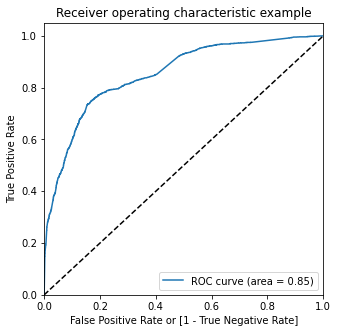

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Probablity)

So we have ROC curve area value as 0.85 which is quite acceptable.

So now, let us find the Optimal cut-off value for our predicted probablity.

In [81]:
cuttoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Creating range of cutt-offs to assess their accuracies.

for i in cuttoffs:
    y_train_pred_final[i] = y_train_pred_final.Probablity.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Probablity,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4678,0,0.074348,0,1,0,0,0,0,0,0,0,0,0
532,0,0.291902,0,1,1,1,0,0,0,0,0,0,0
7280,0,0.231764,0,1,1,1,0,0,0,0,0,0,0
4998,0,0.076677,0,1,0,0,0,0,0,0,0,0,0
6834,1,0.220460,0,1,1,1,0,0,0,0,0,0,0


In [82]:
# Calculating Accuracy, Sensitivity and Specificity for above cutt-off values.

cuttoff_metrics = pd.DataFrame(columns = ['cutt_off', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in cuttoffs:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    Sensitivity = cm1[1,1] / (cm1[1,0]+cm1[1,1])
    Specificity = cm1[0,0] / (cm1[0,0]+cm1[0,1])
    
    cuttoff_metrics.loc[i] = [i, Accuracy, Sensitivity, Specificity]

cuttoff_metrics

,cutt_off,Accuracy,Sensitivity,Specificity
0.0,0.0,0.379356,1.000000,0.000000
0.1,0.1,0.575838,0.969379,0.335294
0.2,0.2,0.655659,0.935258,0.484759
0.3,0.3,0.780451,0.784339,0.778075
0.4,0.4,0.803186,0.733596,0.845722
0.5,0.5,0.792897,0.637795,0.887701
0.6,0.6,0.778128,0.546807,0.919519
0.7,0.7,0.761036,0.458005,0.946257
0.8,0.8,0.728344,0.321960,0.976738
0.9,0.9,0.709094,0.247594,0.991176


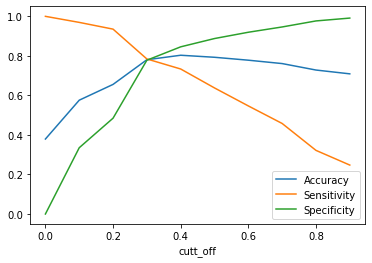

In [83]:
# Plotting the above accuracies to find an optimal cutt-off.

cuttoff_metrics.plot.line(x='cutt_off', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

The intersection point is what gives us the optimal cut-off which is around 0.35.

In [84]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Probablity.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Probablity,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
4678,0,0.074348,0,1,0,0,0,0,0,0,0,0,0,0
532,0,0.291902,0,1,1,1,0,0,0,0,0,0,0,0
7280,0,0.231764,0,1,1,1,0,0,0,0,0,0,0,0
4998,0,0.076677,0,1,0,0,0,0,0,0,0,0,0,0
6834,1,0.220460,0,1,1,1,0,0,0,0,0,0,0,0


In [85]:
# Checking overall accuracy again

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction))

0.7972120809824096


In [86]:
# Lets see the confusion matrix again.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
confusion2

array([[3077,  663],
       [ 559, 1727]], dtype=int64)

In [87]:
TP = confusion[1,1] #-True Positive
FP = confusion[0,1] #-False Positive
TN = confusion[0,0] #-True Negative
FN = confusion[1,0] #-False Negative

# Calculating Sensitivity

print('Sensitivity = ', TP/float(TP+FN))

# Calculating Specificity

print('Specificity = ', TN/float(TN+FP))

# Calculating Flase Positive Rate

print('Flase Positive Rate = ',FP/float(TN+FP))

Sensitivity =  0.6377952755905512
Specificity =  0.8877005347593583
Flase Positive Rate =  0.11229946524064172


Checking the precision-recall curve.

In [88]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_prediction))

print(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction))

0.7225941422594142
0.7554680664916885


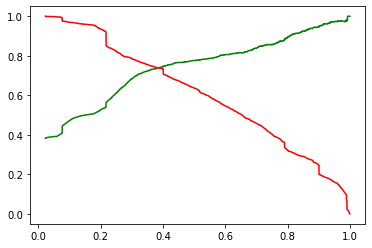

In [89]:
# Precision-Recall curve

from sklearn.metrics import precision_recall_curve

# y_train_pred_final.Converted, y_train_pred_final.final_Predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Probablity)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Now that we have a decent model built, let's do prediction on test set too.

In [90]:
# Scaling test set

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [91]:
X_test_sm = sm.add_constant(X_test[cols])

In [92]:
y_test_pred = res.predict(X_test_sm) # Predicting the target values.

# Creating a dataframe with actual converted values and corresponding predicted values.

y_test_pred_df = pd.DataFrame({'Converted':y_test, 'Probability': y_test_pred})

y_test_pred_df.head()

,Converted,Probability
377,1,0.586796
8911,1,0.076677
7339,0,0.076677
6340,0,0.076677
3786,1,0.972413


In [93]:
y_test_pred_df['final_prediction'] = y_test_pred_df.Probability.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_df.head()

,Converted,Probability,final_prediction
377,1,0.586796,1
8911,1,0.076677,0
7339,0,0.076677,0
6340,0,0.076677,0
3786,1,0.972413,1


In [94]:
# Checking overall accuracy.

print(metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.final_prediction))

0.7990708478513356


So the model's accuracy on test set is also 79% (round to 80%) which is a good sign of a decent model.

In [95]:
confusion3 = metrics.confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.final_prediction)
confusion3

array([[1314,  289],
       [ 230,  750]], dtype=int64)

In [96]:
TP = confusion3[1,1] #-True Positive
FP = confusion3[0,1] #-False Positive
TN = confusion3[0,0] #-True Negative
FN = confusion3[1,0] #-False Negative

# Calculating Sensitivity

print('Sensitivity = ', TP/float(TP+FN))

# Calculating Specificity

print('Specificity = ', TN/float(TN+FP))

Sensitivity =  0.7653061224489796
Specificity =  0.8197130380536494


In [97]:
y_test_pred_df['Lead Score'] = y_test_pred_df.Probability.map(lambda x: round(x * 100))
y_test_pred_df.head()

,Converted,Probability,final_prediction,Lead Score
377,1,0.586796,1,59
8911,1,0.076677,0,8
7339,0,0.076677,0,8
6340,0,0.076677,0,8
3786,1,0.972413,1,97


# Conclusion

Following points are to be remembered in order to get more lead conversions :

1. The total time spent on the Website gives good prediction of successful lead conversion.
2. Lead Source from Google, Direct Traffic and Olark Chat have good conversions, so should focus more on them. Also Reference and Welingak Website higher conversion rate, so should not be ignored at any cost.
3. Lead Origin from Add Form have good conversion rate.
4. Unemployeed and Working Professionals are seen to be converted better than others.